In [22]:
import pandas as pd
import numpy as np
from tools.parsers import generalinquirer as generalInquirerParser
from tools.parsers import negation as negationParser 
from tools.sentimentanalysis import preparation
from nltk import word_tokenize
import time

In [352]:
prepData = preparation.Preparation()
parserInquirer = generalInquirerParser.GeneralInquirer()
parserNegation = negationParser.Negation()
sentimentDictionaries = parserInquirer.readFileCsv(parserInquirer.combinedFileLoc)
sentences = parserInquirer.readFileCsv(prepData.defaultFileNameSentimentSentences)
negations = parserNegation.readFileCsv(parserNegation.defaultFileNameProcessed)
print("Shape Sentences: {}".format(sentences.shape))
print("Shape Negations: {}".format(negations.shape))

Shape Sentences: (9785, 12)
Shape Negations: (16, 2)


In [353]:
sentences['textUpper'] = sentences['text'].map( lambda cell: cell.upper())
sentimentDictionaries['entryUpper'] = sentimentDictionaries['entry'].map(lambda cell: cell.upper())
polarizedSentences = sentences[sentences['sentiment-type'] == 1]
polarizedSentences.shape

(9118, 13)

In [354]:
sentimentDictionaries.drop_duplicates(subset = 'entryUpper', inplace = True)

In [355]:
print("Negative: {}".format(polarizedSentences[polarizedSentences['sentiment-intensity'] < 0].shape))
print("Neutral: {}".format(polarizedSentences[polarizedSentences['sentiment-intensity'] == 0].shape))
print("Positive: {}".format(polarizedSentences[polarizedSentences['sentiment-intensity'] > 0].shape))

Negative: (2489, 13)
Neutral: (5036, 13)
Positive: (1593, 13)


In [356]:
sentimentDictionaries[sentimentDictionaries['passive'] == 'passive']

,positiv,negativ,active,passive,affil,hostile,strong,power,weak,submit,...,feel,need,persist,entry,othtags,type,pos,stemmed,priorpolarity,entryUpper
2,NaN,negativ,NaN,passive,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,abate,supv,weaksubj,verb,y,negative,ABATE
3,NaN,negativ,NaN,passive,NaN,NaN,NaN,NaN,weak,submit,...,NaN,NaN,NaN,abdicate,supv,weaksubj,verb,y,negative,ABDICATE
4,NaN,negativ,NaN,passive,NaN,hostile,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,abhor,supv,strongsubj,anypos,y,negative,ABHOR
8,NaN,negativ,NaN,passive,NaN,NaN,NaN,NaN,weak,submit,...,NaN,NaN,NaN,abject,modif,strongsubj,adj,n,negative,ABJECT
13,positiv,NaN,NaN,passive,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,abound,supv,weaksubj,verb,y,positive,ABOUND
18,NaN,negativ,NaN,passive,NaN,NaN,NaN,NaN,weak,NaN,...,NaN,NaN,NaN,absent-minded,modif,strongsubj,adj,n,negative,ABSENT-MINDED
36,positiv,NaN,NaN,passive,NaN,NaN,NaN,NaN,NaN,submit,...,NaN,NaN,NaN,accept,supv,weaksubj,verb,y,positive,ACCEPT
38,positiv,NaN,NaN,passive,affil,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,acceptance,noun,weaksubj,noun,n,positive,ACCEPTANCE
58,NaN,negativ,NaN,passive,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,ache,supv,strongsubj,verb,y,negative,ACHE
64,NaN,negativ,NaN,passive,NaN,hostile,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,acrimony,noun,strongsubj,noun,n,negative,ACRIMONY


In [357]:
tStart = time.time()

def processWords(row):
    words = [ word for word in [cleanUpWord(w) for w in word_tokenize(row['textUpper'])] if len(word) > 0]
    row['wordsList'] = '|'.join(words)
    row['wordCount'] = len(words)
    return row

polarizedSentences = polarizedSentences.apply(lambda row: processWords(row), axis = 1)
tEnd = time.time()
print("Timed: {}".format(str(tEnd - tStart)))

Timed: 11.1659998894


In [55]:
polarizedSentences

,index,docName,dirName,idx,startByte,endByte,sentLen,annotsCount,text,sentiment-measured,sentiment-type,sentiment-intensity,textUpper,priorpolarityCountnegative,wordsList,wordCount
0,0,13.40.05-15087,20010620,0,109,226,117,2,The Kimberley Provincial Hospital said it woul...,1,1,0.000000,THE KIMBERLEY PROVINCIAL HOSPITAL SAID IT WOUL...,0,THE|KIMBERLEY|PROVINCIAL|HOSPITAL|SAID|IT|WOUL...,19
1,7,13.40.05-15087,20010620,7,793,884,91,2,The woman was admitted to the hospital on Satu...,1,1,0.000000,THE WOMAN WAS ADMITTED TO THE HOSPITAL ON SATU...,0,THE|WOMAN|WAS|ADMITTED|TO|THE|HOSPITAL|ON|SATU...,15
2,11,13.40.05-15087,20010620,11,656,749,93,3,He said it was his opinion that the patient --...,1,1,0.052500,HE SAID IT WAS HIS OPINION THAT THE PATIENT --...,0,HE|SAID|IT|WAS|HIS|OPINION|THAT|THE|PATIENT|--...,19
3,13,13.40.05-15087,20010620,13,588,655,67,3,Saeed said indications were that those tests w...,1,1,0.000000,SAEED SAID INDICATIONS WERE THAT THOSE TESTS W...,0,SAEED|SAID|INDICATIONS|WERE|THAT|THOSE|TESTS|W...,11
4,15,23.46.20-17835,20010627,0,1782,1960,178,3,"It is believed that sand from northern areas, ...",1,1,0.000000,"IT IS BELIEVED THAT SAND FROM NORTHERN AREAS, ...",0,IT|IS|BELIEVED|THAT|SAND|FROM|NORTHERN|AREAS|E...,28
5,26,23.46.20-17835,20010627,11,1466,1597,131,2,Private organizations are also being encourage...,1,1,0.000000,PRIVATE ORGANIZATIONS ARE ALSO BEING ENCOURAGE...,0,PRIVATE|ORGANIZATIONS|ARE|ALSO|BEING|ENCOURAGE...,18
6,29,00.48.42-17806,20010630,1,1376,1578,202,1,"Labus said the United States, which had until ...",1,1,0.000000,"LABUS SAID THE UNITED STATES, WHICH HAD UNTIL ...",0,LABUS|SAID|THE|UNITED|STATES|WHICH|HAD|UNTIL|T...,30
7,31,00.48.42-17806,20010630,3,2648,2698,50,2,"""We decided to make some bold decisions,"" he s...",1,1,0.081250,"""WE DECIDED TO MAKE SOME BOLD DECISIONS,"" HE S...",0,``|WE|DECIDED|TO|MAKE|SOME|BOLD|DECISIONS|''|H...,11
8,32,00.48.42-17806,20010630,4,254,468,214,4,"""Nobody is happy when a former president is ta...",1,1,0.000000,"""NOBODY IS HAPPY WHEN A FORMER PRESIDENT IS TA...",0,``|NOBODY|IS|HAPPY|WHEN|A|FORMER|PRESIDENT|IS|...,39
9,34,00.48.42-17806,20010630,6,4017,4133,116,4,"""But the costs of failing to support Yugoslavi...",1,1,-0.350000,"""BUT THE COSTS OF FAILING TO SUPPORT YUGOSLAVI...",0,``|BUT|THE|COSTS|OF|FAILING|TO|SUPPORT|YUGOSLA...,22


In [49]:
sentimentDictionaries

,positiv,negativ,active,passive,affil,hostile,strong,power,weak,submit,...,pain,feel,need,persist,entry,othtags,type,pos,stemmed,priorpolarity
0,NaN,negativ,NaN,NaN,NaN,NaN,NaN,NaN,weak,NaN,...,NaN,NaN,NaN,NaN,abandon,supv,weaksubj,verb,y,negative
1,NaN,negativ,NaN,NaN,NaN,NaN,NaN,NaN,weak,NaN,...,NaN,NaN,NaN,NaN,abandonment,noun,weaksubj,noun,n,negative
2,NaN,negativ,NaN,passive,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,abate,supv,weaksubj,verb,y,negative
3,NaN,negativ,NaN,passive,NaN,NaN,NaN,NaN,weak,submit,...,NaN,NaN,NaN,NaN,abdicate,supv,weaksubj,verb,y,negative
4,NaN,negativ,NaN,passive,NaN,hostile,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,abhor,supv,strongsubj,anypos,y,negative
5,NaN,negativ,NaN,passive,NaN,hostile,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,abhor,supv,strongsubj,verb,y,negative
6,positiv,NaN,active,NaN,affil,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,abide,supv,strongsubj,anypos,y,positive
7,positiv,NaN,NaN,NaN,NaN,NaN,strong,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,ability,noun,weaksubj,noun,n,positive
8,NaN,negativ,NaN,passive,NaN,NaN,NaN,NaN,weak,submit,...,NaN,NaN,NaN,NaN,abject,modif,strongsubj,adj,n,negative
9,positiv,NaN,NaN,NaN,NaN,NaN,strong,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,able,modif,weaksubj,adj,n,positive


In [379]:
def countNegations(row):
    words = row['wordsList'].split('|')
    negations['found'] = negations.apply(lambda row: 1 if row['phraseUpper'] in words else 0, axis = 1)
    row['negations'] = negations['found'].sum()
    return row

tStart = time.time()
polarizedSentences = polarizedSentences.apply(lambda row: countNegations(row), axis = 1)
tEnd = time.time()
print("Timed: {}".format(str(tEnd-tStart)))

Timed: 7.46800017357


In [212]:
def countOccurenceColumn(row, lookFor, columnName, normalize):
    words = row['wordsList'].split('|')
    lookFor['found'] = lookFor.apply(lambda rowLook: 1 if rowLook['entryUpper'] in words else 0, axis = 1)
    row[columnName] = lookFor['found'].sum()
    if normalize:
        row[columnName] = row[columnName] / float(len(words))
    return row

def CalculateColumn(column, df, val = None, typeWord = None, normalize = True):
    global sentimentDictionaries
    
    compareVal = column
    if val != None:
        compareVal = val
    columnName = column+'Count'
    if val != None:
        columnName = columnName + val
    if typeWord != None:
        columnName = columnName + typeWord
    
    if typeWord == None:
        lookFor = sentimentDictionaries[sentimentDictionaries[column] == compareVal].reset_index()
    else:
        lookFor = sentimentDictionaries[(sentimentDictionaries[column] == compareVal) & (sentimentDictionaries['type'] == typeWord)].reset_index()
    
    print("LookFor shape: {}".format(lookFor.shape))
    df[columnName]  = 0
    tStart = time.time()
    df = df.apply(lambda row: countOccurenceColumn(row, lookFor, columnName, normalize), axis = 1)
    tEnd = time.time()
    print("Timed({}): {}".format(columnName, str(tEnd-tStart)))
    
    return df

In [359]:
polarizedSentences = CalculateColumn('priorpolarity', polarizedSentences, 'negative')
polarizedSentences = CalculateColumn('priorpolarity', polarizedSentences, 'positive')
polarizedSentences = CalculateColumn('priorpolarity', polarizedSentences, 'negative', 'strongsubj')
polarizedSentences = CalculateColumn('priorpolarity', polarizedSentences, 'positive', 'strongsubj')
polarizedSentences = CalculateColumn('priorpolarity', polarizedSentences, 'negative', 'weaksubj')
polarizedSentences = CalculateColumn('priorpolarity', polarizedSentences, 'positive', 'weaksubj')

LookFor shape: (1802, 27)
Timed(priorpolarityCountnegative): 195.225000143
LookFor shape: (1302, 27)
Timed(priorpolarityCountpositive): 146.350999832
LookFor shape: (1142, 27)
Timed(priorpolarityCountnegativestrongsubj): 125.743999958
LookFor shape: (736, 27)
Timed(priorpolarityCountpositivestrongsubj): 83.9739999771
LookFor shape: (660, 27)
Timed(priorpolarityCountnegativeweaksubj): 75.5080001354
LookFor shape: (566, 27)
Timed(priorpolarityCountpositiveweaksubj): 68.6679999828


In [361]:
polarizedSentences = CalculateColumn('hostile', polarizedSentences, None, 'weaksubj')
polarizedSentences = CalculateColumn('strong', polarizedSentences, None, 'weaksubj')
polarizedSentences = CalculateColumn('hostile', polarizedSentences, None, 'strongsubj')
polarizedSentences = CalculateColumn('strong', polarizedSentences, None, 'strongsubj')
polarizedSentences = CalculateColumn('hostile', polarizedSentences)
polarizedSentences = CalculateColumn('strong', polarizedSentences)

LookFor shape: (158, 27)
Timed(hostileCountweaksubj): 23.4609999657
LookFor shape: (367, 27)
Timed(strongCountweaksubj): 46.5169999599
LookFor shape: (352, 27)
Timed(hostileCountstrongsubj): 52.2940001488
LookFor shape: (335, 27)
Timed(strongCountstrongsubj): 53.4159998894
LookFor shape: (510, 27)
Timed(hostileCount): 64.3159999847
LookFor shape: (702, 27)
Timed(strongCount): 84.6240000725


In [ ]:
polarizedSentences = CalculateColumn('active', polarizedSentences, None, 'weaksubj')
polarizedSentences = CalculateColumn('passive', polarizedSentences, None, 'weaksubj')
polarizedSentences = CalculateColumn('active', polarizedSentences, None, 'strongsubj')
polarizedSentences = CalculateColumn('passive', polarizedSentences, None, 'strongsubj')
polarizedSentences = CalculateColumn('active', polarizedSentences)
polarizedSentences = CalculateColumn('passive', polarizedSentences)

In [363]:
polarizedSentences = CalculateColumn('positiv', polarizedSentences, None, 'weaksubj')
polarizedSentences = CalculateColumn('negativ', polarizedSentences, None, 'weaksubj')
polarizedSentences = CalculateColumn('positiv', polarizedSentences, None, 'strongsubj')
polarizedSentences = CalculateColumn('negativ', polarizedSentences, None, 'strongsubj')
polarizedSentences = CalculateColumn('positiv', polarizedSentences)
polarizedSentences = CalculateColumn('negativ', polarizedSentences)

LookFor shape: (506, 27)
Timed(positivCountweaksubj): 61.5239999294
LookFor shape: (578, 27)
Timed(negativCountweaksubj): 67.3639998436
LookFor shape: (713, 27)
Timed(positivCountstrongsubj): 80.875
LookFor shape: (1079, 27)
Timed(negativCountstrongsubj): 120.065999985
LookFor shape: (1219, 27)
Timed(positivCount): 142.598999977
LookFor shape: (1657, 27)
Timed(negativCount): 183.894000053


In [ ]:
import cPickle as pickle

In [364]:
with open('./data-sentiment-polarized.dump','wb') as fp:
    pickle.dump(polarizedSentences,fp)

In [63]:
with open('./data-sentiment-polarized.dump','rb') as fp:
    data2 = pickle.load(fp)

In [64]:
data2

,index,docName,dirName,idx,startByte,endByte,sentLen,annotsCount,text,sentiment-measured,...,priorpolarityCountnegativestrongsubj,priorpolarityCountpositivestrongsubj,priorpolarityCountnegativeweaksubj,priorpolarityCountpositiveweaksubj,activeCountweaksubj,passiveCountweaksubj,activeCountstrongsubj,passiveCountstrongsubj,activeCount,passiveCount
0,0,13.40.05-15087,20010620,0,109,226,117,2,The Kimberley Provincial Hospital said it woul...,1,...,0.000000,0.000000,0.052632,0.000000,0.000000,0.052632,0.052632,0.105263,0.052632,0.157895
1,7,13.40.05-15087,20010620,7,793,884,91,2,The woman was admitted to the hospital on Satu...,1,...,0.066667,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,11,13.40.05-15087,20010620,11,656,749,93,3,He said it was his opinion that the patient --...,1,...,0.000000,0.000000,0.052632,0.473684,0.000000,0.210526,0.000000,0.000000,0.000000,0.210526
3,13,13.40.05-15087,20010620,13,588,655,67,3,Saeed said indications were that those tests w...,1,...,0.000000,0.000000,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,15,23.46.20-17835,20010627,0,1782,1960,178,3,"It is believed that sand from northern areas, ...",1,...,0.000000,0.000000,0.000000,0.035714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,26,23.46.20-17835,20010627,11,1466,1597,131,2,Private organizations are also being encourage...,1,...,0.000000,0.000000,0.444444,0.666667,0.833333,0.166667,0.000000,0.000000,0.833333,0.166667
6,29,00.48.42-17806,20010630,1,1376,1578,202,1,"Labus said the United States, which had until ...",1,...,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,31,00.48.42-17806,20010630,3,2648,2698,50,2,"""We decided to make some bold decisions,"" he s...",1,...,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.090909,0.000000
8,32,00.48.42-17806,20010630,4,254,468,214,4,"""Nobody is happy when a former president is ta...",1,...,0.000000,0.153846,0.000000,0.128205,0.051282,0.000000,0.025641,0.000000,0.076923,0.000000
9,34,00.48.42-17806,20010630,6,4017,4133,116,4,"""But the costs of failing to support Yugoslavi...",1,...,0.000000,0.363636,0.136364,0.181818,0.272727,0.090909,0.272727,0.090909,0.545455,0.181818


In [78]:
import matplotlib.pyplot as plt
%matplotlib inline

In [222]:
def compareValues(df, column):
    plt.figure()
    plt.plot(df[column][df['sentiment-intensity'] == 0].values)
    plt.title(column + " - Neutral")
    mean = str(df[column][df['sentiment-intensity'] == 0].mean())
    std = str(df[column][df['sentiment-intensity'] == 0].std())
    quantile = str(df[column][df['sentiment-intensity'] == 0].quantile([0.25, 0.5, 0.9, 0.95, 0.99, 1.0]))    
    print("Neutral: mean = {}; std = {}; 0.9".format(mean, std))
    print("Quantile:")
    print(quantile)
    print("")

    plt.figure()
    plt.plot(df[column][df['sentiment-intensity'] > 0 ].values)
    plt.title(column + " - Positive")
    mean = str(df[column][df['sentiment-intensity'] > 0].mean())
    std = str(df[column][df['sentiment-intensity'] > 0].std())
    quantile = str(df[column][df['sentiment-intensity'] > 0].quantile([0.25, 0.5, 0.9, 0.95, 0.99, 1.0]))
    print("Positive: mean = {}; std = {}".format(mean, std))
    print("Quantile:")
    print(quantile)
    print("")
    
    plt.figure()
    plt.plot(df[column][df['sentiment-intensity'] < 0 ].values)
    plt.title(column + " - Negative")
    mean = str(df[column][df['sentiment-intensity'] < 0].mean())
    std = str(df[column][df['sentiment-intensity'] < 0].std())
    quantile = str(df[column][df['sentiment-intensity'] < 0].quantile([0.25, 0.5, 0.9, 0.95, 0.99, 1.0]))
    print("Negative: mean = {}; std = {}".format(mean, std))
    print("Quantile:")
    print(quantile)
    print("")
    plt.show()

Neutral: mean = 0.0115893224856; std = 0.0272303107782; 0.9
Quantile:
0.25    0.000000
0.50    0.000000
0.90    0.043478
0.95    0.062500
0.99    0.115359
1.00    0.333333
Name: priorpolarityCountnegativestrongsubj, dtype: float64

Positive: mean = 0.00511917176284; std = 0.0207276602692
Quantile:
0.25    0.000000
0.50    0.000000
0.90    0.000000
0.95    0.038462
0.99    0.100000
1.00    0.333333
Name: priorpolarityCountnegativestrongsubj, dtype: float64

Negative: mean = 0.0235817409561; std = 0.0434005811116
Quantile:
0.25    0.000000
0.50    0.000000
0.90    0.071429
0.95    0.105263
0.99    0.200000
1.00    0.500000
Name: priorpolarityCountnegativestrongsubj, dtype: float64



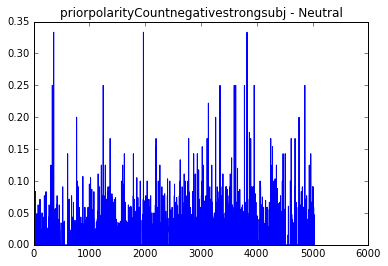

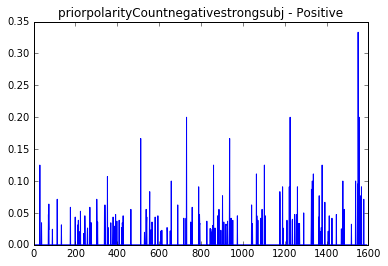

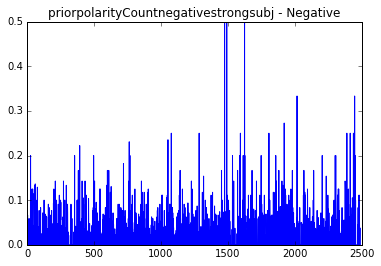

In [366]:
compareValues(polarizedSentences, 'priorpolarityCountnegativestrongsubj')

Neutral: mean = 0.0119082388295; std = 0.0303378184051; 0.9
Quantile:
0.25    0.000000
0.50    0.000000
0.90    0.043478
0.95    0.066667
0.99    0.125000
1.00    0.500000
Name: priorpolarityCountpositivestrongsubj, dtype: float64

Positive: mean = 0.0263669780508; std = 0.0532354489434
Quantile:
0.25    0.000000
0.50    0.000000
0.90    0.076923
0.95    0.117647
0.99    0.250000
1.00    0.500000
Name: priorpolarityCountpositivestrongsubj, dtype: float64

Negative: mean = 0.00928776983869; std = 0.0228416351301
Quantile:
0.25    0.000000
0.50    0.000000
0.90    0.038462
0.95    0.055556
0.99    0.111111
1.00    0.200000
Name: priorpolarityCountpositivestrongsubj, dtype: float64



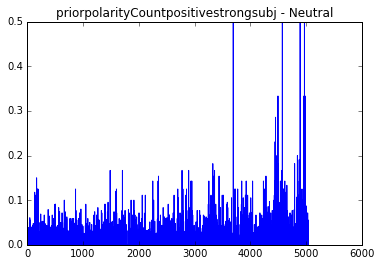

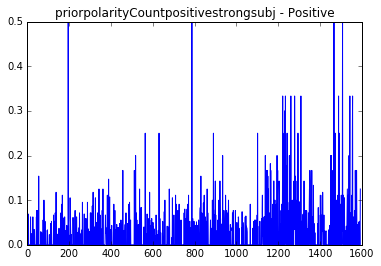

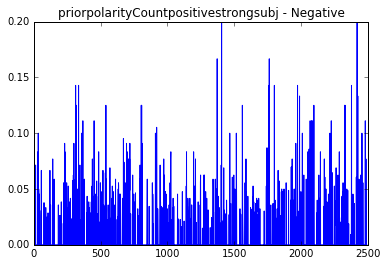

In [367]:
compareValues(polarizedSentences, 'priorpolarityCountpositivestrongsubj')

Neutral: mean = 0.0382198322638; std = 0.0485726159653; 0.9
Quantile:
0.25    0.000000
0.50    0.028571
0.90    0.097561
0.95    0.125000
0.99    0.200000
1.00    0.500000
Name: priorpolarityCountpositive, dtype: float64

Positive: mean = 0.0674011206182; std = 0.0971682927851
Quantile:
0.25    0.000000
0.50    0.046512
0.90    0.149630
0.95    0.200000
0.99    0.434286
1.00    1.000000
Name: priorpolarityCountpositive, dtype: float64

Negative: mean = 0.0308814907912; std = 0.043006397913
Quantile:
0.25    0.000000
0.50    0.000000
0.90    0.085714
0.95    0.111111
0.99    0.176471
1.00    0.500000
Name: priorpolarityCountpositive, dtype: float64



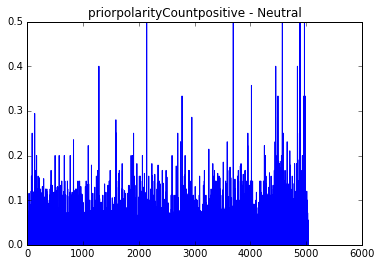

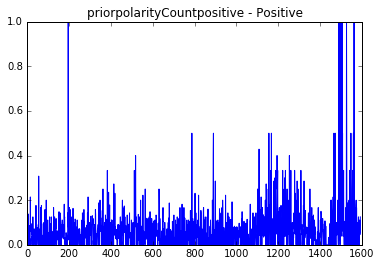

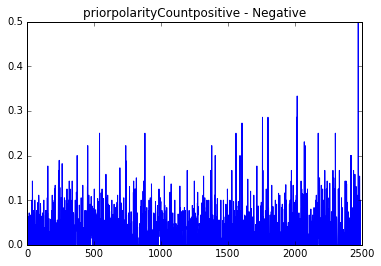

In [225]:
compareValues(polarizedSentences, 'priorpolarityCountpositive')

Neutral: mean = 0.028261798055; std = 0.0413780463361; 0.9
Quantile:
0.25    0.000000
0.50    0.000000
0.90    0.080000
0.95    0.105263
0.99    0.176471
1.00    0.375000
Name: priorpolarityCountnegative, dtype: float64

Positive: mean = 0.0156859022406; std = 0.0341230327141
Quantile:
0.25    0.000000
0.50    0.000000
0.90    0.055556
0.95    0.084783
0.99    0.154872
1.00    0.333333
Name: priorpolarityCountnegative, dtype: float64

Negative: mean = 0.0467830579646; std = 0.057731554972
Quantile:
0.25    0.000000
0.50    0.034483
0.90    0.111111
0.95    0.142857
0.99    0.250000
1.00    1.000000
Name: priorpolarityCountnegative, dtype: float64



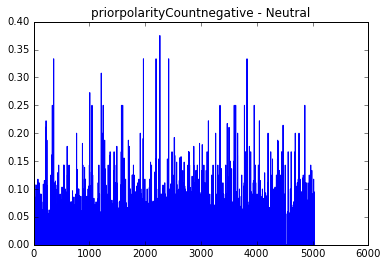

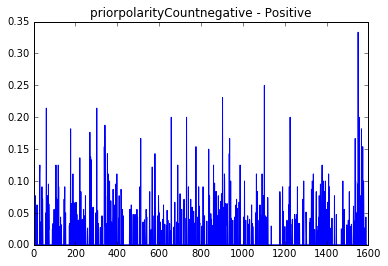

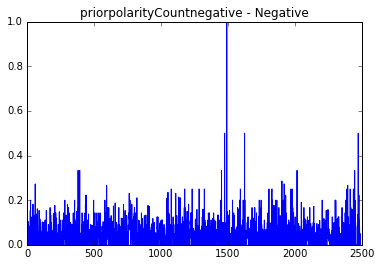

In [368]:
compareValues(polarizedSentences, 'priorpolarityCountnegative')

Neutral: mean = 0.0263115934343; std = 0.0380603925702; 0.9
Quantile:
0.25    0.000000
0.50    0.000000
0.90    0.076923
0.95    0.098171
0.99    0.153846
1.00    0.500000
Name: priorpolarityCountpositiveweaksubj, dtype: float64

Positive: mean = 0.0410341425674; std = 0.0819119997475
Quantile:
0.25    0.000000
0.50    0.020000
0.90    0.100000
0.95    0.142857
0.99    0.256667
1.00    1.000000
Name: priorpolarityCountpositiveweaksubj, dtype: float64

Negative: mean = 0.0215937209525; std = 0.0364434726107
Quantile:
0.25    0.000000
0.50    0.000000
0.90    0.066667
0.95    0.090909
0.99    0.150000
1.00    0.500000
Name: priorpolarityCountpositiveweaksubj, dtype: float64



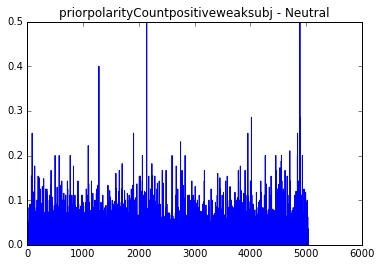

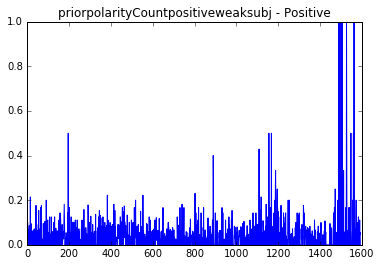

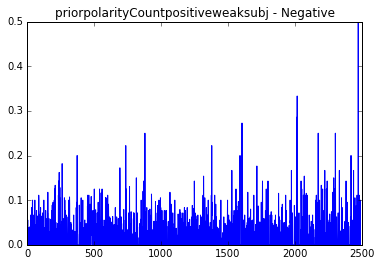

In [227]:
compareValues(polarizedSentences, 'priorpolarityCountpositiveweaksubj')

Neutral: mean = 0.0166724755694; std = 0.0308494194321; 0.9
Quantile:
0.25    0.000000
0.50    0.000000
0.90    0.055556
0.95    0.076923
0.99    0.135934
1.00    0.333333
Name: priorpolarityCountnegativeweaksubj, dtype: float64

Positive: mean = 0.0105667304777; std = 0.0262342246408
Quantile:
0.25    0.000000
0.50    0.000000
0.90    0.043478
0.95    0.066667
0.99    0.125000
1.00    0.214286
Name: priorpolarityCountnegativeweaksubj, dtype: float64

Negative: mean = 0.0232013170085; std = 0.0387400891199
Quantile:
0.25    0.000000
0.50    0.000000
0.90    0.071429
0.95    0.096774
0.99    0.155385
1.00    0.500000
Name: priorpolarityCountnegativeweaksubj, dtype: float64



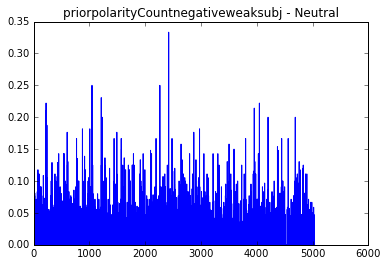

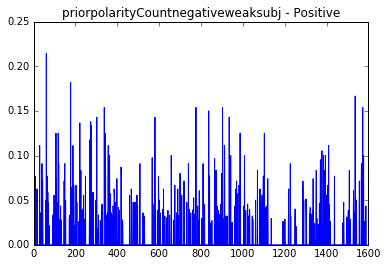

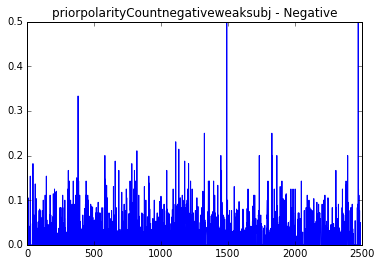

In [228]:
compareValues(polarizedSentences, 'priorpolarityCountnegativeweaksubj')

Neutral: mean = 0.024331180645; std = 0.0387341488666; 0.9
Quantile:
0.25    0.000000
0.50    0.000000
0.90    0.071429
0.95    0.095238
0.99    0.166667
1.00    0.375000
Name: negativCount, dtype: float64

Positive: mean = 0.0120342250617; std = 0.0291468756477
Quantile:
0.25    0.000000
0.50    0.000000
0.90    0.046300
0.95    0.071429
0.99    0.138325
1.00    0.250000
Name: negativCount, dtype: float64

Negative: mean = 0.0416858793102; std = 0.0533451472018
Quantile:
0.25    0.000000
0.50    0.030303
0.90    0.111111
0.95    0.142857
0.99    0.230769
1.00    0.500000
Name: negativCount, dtype: float64



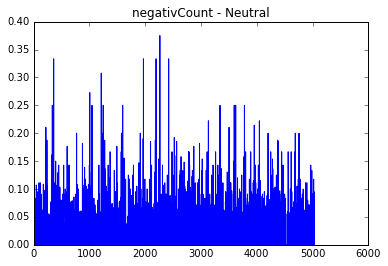

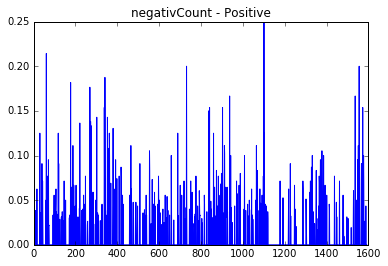

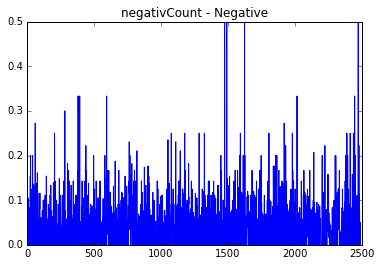

In [370]:
compareValues(polarizedSentences, 'negativCount')

Neutral: mean = 0.0312092225931; std = 0.044056949417; 0.9
Quantile:
0.25    0.000000
0.50    0.017857
0.90    0.083333
0.95    0.111111
0.99    0.181818
1.00    0.500000
Name: positivCount, dtype: float64

Positive: mean = 0.0556351861639; std = 0.0903887299249
Quantile:
0.25    0.000000
0.50    0.035714
0.90    0.125000
0.95    0.176471
0.99    0.338667
1.00    1.000000
Name: positivCount, dtype: float64

Negative: mean = 0.0244201913147; std = 0.0383188144938
Quantile:
0.25    0.000000
0.50    0.000000
0.90    0.071777
0.95    0.096160
0.99    0.162703
1.00    0.500000
Name: positivCount, dtype: float64



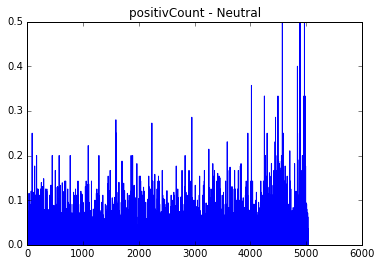

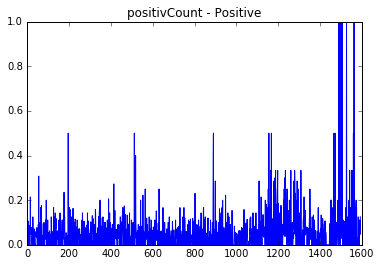

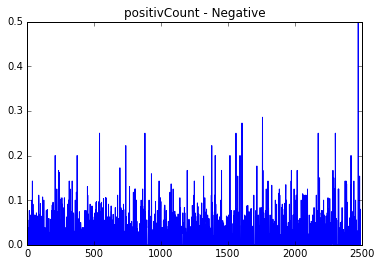

In [371]:
compareValues(polarizedSentences, 'positivCount')

Neutral: mean = 0.0102226003878; std = 0.0242336839011; 0.9
Quantile:
0.25    0.000000
0.50    0.000000
0.90    0.040000
0.95    0.059269
0.99    0.105263
1.00    0.333333
Name: hostileCount, dtype: float64

Positive: mean = 0.00590384352454; std = 0.0186692598695
Quantile:
0.25    0.000000
0.50    0.000000
0.90    0.027027
0.95    0.045455
0.99    0.095619
1.00    0.153846
Name: hostileCount, dtype: float64

Negative: mean = 0.0187779702546; std = 0.039266615857
Quantile:
0.25    0.000000
0.50    0.000000
0.90    0.062500
0.95    0.086460
0.99    0.154332
1.00    1.000000
Name: hostileCount, dtype: float64



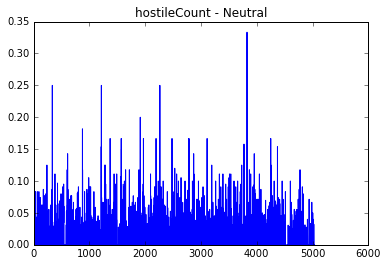

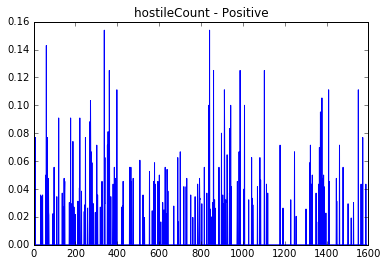

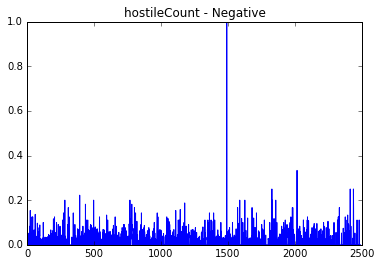

In [372]:
compareValues(polarizedSentences, 'hostileCount')

Neutral: mean = 0.0285147951801; std = 0.0392429909524; 0.9
Quantile:
0.25    0.000000
0.50    0.000000
0.90    0.076923
0.95    0.100000
0.99    0.157895
1.00    0.500000
Name: strongCount, dtype: float64

Positive: mean = 0.0347667600596; std = 0.0707602872369
Quantile:
0.25    0.000000
0.50    0.000000
0.90    0.094795
0.95    0.125000
0.99    0.200000
1.00    1.000000
Name: strongCount, dtype: float64

Negative: mean = 0.0276666889355; std = 0.040270766934
Quantile:
0.25    0.000000
0.50    0.000000
0.90    0.080000
0.95    0.107143
0.99    0.158947
1.00    0.500000
Name: strongCount, dtype: float64



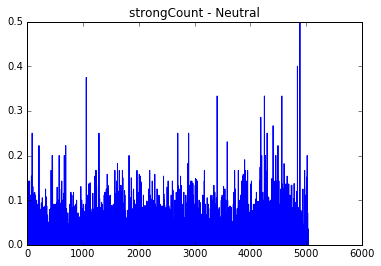

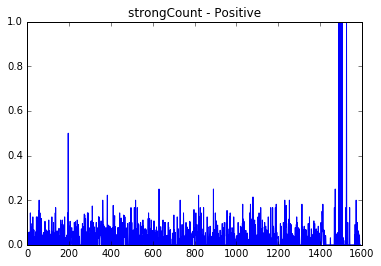

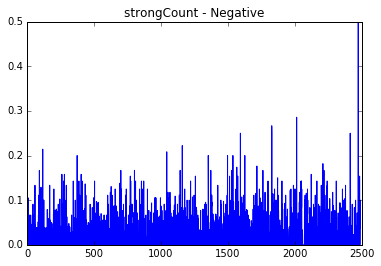

In [373]:
compareValues(polarizedSentences, 'strongCount')

In [207]:
polarizedSentences[polarizedSentences['priorpolarityCountnegative'] > 1]
polarizedSentences[polarizedSentences['index'] == 415].values[0][14]

"``|WE|LEARNT|OF|THE|ATTACKS|WITH|GREAT|SHOCK|AND|SORROW|''|THE|MINISTERS|SAID"

In [210]:
words = polarizedSentences[polarizedSentences['index'] == 415].values[0][14].split('|')
lookFor = sentimentDictionaries[(sentimentDictionaries['priorpolarity'] == 'negative')].reset_index()
lookFor['found'] = lookFor.apply(lambda rowLook: 1 if rowLook['entryUpper'] in words else 0, axis = 1)
lookFor[lookFor['found'] == 1]

,index,positiv,negativ,active,passive,affil,hostile,strong,power,weak,...,need,persist,entry,othtags,type,pos,stemmed,priorpolarity,entryUpper,found
1394,4040,NaN,negativ,NaN,NaN,NaN,NaN,strong,NaN,NaN,...,NaN,NaN,shock,noun,strongsubj,adj,n,negative,SHOCK,1
1450,4200,NaN,negativ,NaN,passive,affil,NaN,NaN,NaN,weak,...,NaN,NaN,sorrow,noun,strongsubj,noun,n,negative,SORROW,1


In [384]:
polarizedSentences['morePositiveThanNegativeStrong'] = 0
dt = polarizedSentences[polarizedSentences['priorpolarityCountpositivestrongsubj'] > polarizedSentences['priorpolarityCountnegativestrongsubj'] ]
polarizedSentences.loc[dt.index,'morePositiveThanNegativeStrong'] = 1

In [385]:
def compareBinaryValues(df, column, txt):
    val1 = polarizedSentences[(polarizedSentences[column] == 0) & (polarizedSentences['sentiment-intensity'] < 0)].shape[0] / float(polarizedSentences[polarizedSentences['sentiment-intensity'] < 0].shape[0])
    print(txt+": Positive <= Negative for negative, {}".format(str(val1)))
    val2 = polarizedSentences[(polarizedSentences[column] == 0) & (polarizedSentences['sentiment-intensity'] > 0)].shape[0] / float(polarizedSentences[polarizedSentences['sentiment-intensity'] > 0].shape[0])
    print(txt+": Positive <= Negative for positive, {}".format(str(val2)))
    val3 = polarizedSentences[(polarizedSentences[column] == 0) & (polarizedSentences['sentiment-intensity'] == 0)].shape[0] / float(polarizedSentences[polarizedSentences['sentiment-intensity'] == 0].shape[0])
    print(txt+": Positive <= Negative for neutral, {}".format(str(val3)))

    val4 = polarizedSentences[(polarizedSentences[column] == 1) & (polarizedSentences['sentiment-intensity'] < 0)].shape[0] / float(polarizedSentences[polarizedSentences['sentiment-intensity'] < 0].shape[0])
    print(txt+": Positive > Negative for negative, {}".format(str(val4)))
    val5 = polarizedSentences[(polarizedSentences[column] == 1) & (polarizedSentences['sentiment-intensity'] > 0)].shape[0] / float(polarizedSentences[polarizedSentences['sentiment-intensity'] > 0].shape[0])
    print(txt+": Positive > Negative for positive, {}".format(str(val5)))
    val6 = polarizedSentences[(polarizedSentences[column] == 1) & (polarizedSentences['sentiment-intensity'] == 0)].shape[0] / float(polarizedSentences[polarizedSentences['sentiment-intensity'] == 0].shape[0])
    print(txt+": Positive > Negative for neutral, {}".format(str(val6)))
    return [val1, val2, val3, val4, val5, val6]

In [386]:
compareBinaryValues(polarizedSentences, 'morePositiveThanNegativeStrong', "Strong")

Strong: Positive <= Negative for negative, 0.868621936521
Strong: Positive <= Negative for positive, 0.667294413057
Strong: Positive <= Negative for neutral, 0.810762509929
Strong: Positive > Negative for negative, 0.131378063479
Strong: Positive > Negative for positive, 0.332705586943
Strong: Positive > Negative for neutral, 0.189237490071


[0.8686219365206911,
 0.6672944130571249,
 0.8107625099285147,
 0.13137806347930897,
 0.33270558694287505,
 0.1892374900714853]

In [387]:
polarizedSentences['morePositiveThanNegativeWeak'] = 0
dt = polarizedSentences[polarizedSentences['priorpolarityCountpositiveweaksubj'] > polarizedSentences['priorpolarityCountnegativeweaksubj'] ]
polarizedSentences.loc[dt.index,'morePositiveThanNegativeWeak'] = 1

In [388]:
compareBinaryValues(polarizedSentences, 'morePositiveThanNegativeWeak', "Weak")

Weak: Positive <= Negative for negative, 0.748493370832
Weak: Positive <= Negative for positive, 0.563716258632
Weak: Positive <= Negative for neutral, 0.652303415409
Weak: Positive > Negative for negative, 0.251506629168
Weak: Positive > Negative for positive, 0.436283741368
Weak: Positive > Negative for neutral, 0.347696584591


[0.7484933708316593,
 0.5637162586315129,
 0.6523034154090548,
 0.2515066291683407,
 0.43628374136848713,
 0.3476965845909452]

In [389]:
polarizedSentences['morePositiveThanNegative'] = 0
dt = polarizedSentences[polarizedSentences['priorpolarityCountpositive'] > polarizedSentences['priorpolarityCountnegative'] ]
polarizedSentences.loc[dt.index,'morePositiveThanNegative'] = 1

In [390]:
compareBinaryValues(polarizedSentences, 'morePositiveThanNegative', "General")

General: Positive <= Negative for negative, 0.745279228606
General: Positive <= Negative for positive, 0.412429378531
General: Positive <= Negative for neutral, 0.606235107228
General: Positive > Negative for negative, 0.254720771394
General: Positive > Negative for positive, 0.587570621469
General: Positive > Negative for neutral, 0.393764892772


[0.7452792286058658,
 0.4124293785310734,
 0.6062351072279587,
 0.2547207713941342,
 0.5875706214689266,
 0.3937648927720413]

In [329]:
results = []
for const in np.linspace(1, 10, num = 100):
    polarizedSentences['morePositiveThanNegativeConst'+str(const)] = 0
    dt = polarizedSentences[polarizedSentences['priorpolarityCountpositive'] > polarizedSentences['priorpolarityCountnegative'] * float(const) ]
    polarizedSentences.loc[dt.index,'morePositiveThanNegativeConst'+str(const)] = 1
    results.append(compareBinaryValues(polarizedSentences, 'morePositiveThanNegativeConst'+str(const), "Consts ({})".format(const)))
    print

Consts (1.0): Positive <= Negative for negative, 1.0
Consts (1.0): Positive <= Negative for positive, 1.0
Consts (1.0): Positive <= Negative for neutral, 1.0
Consts (1.0): Positive > Negative for negative, 0.0
Consts (1.0): Positive > Negative for positive, 0.0
Consts (1.0): Positive > Negative for neutral, 0.0

Consts (1.09090909091): Positive <= Negative for negative, 1.0
Consts (1.09090909091): Positive <= Negative for positive, 1.0
Consts (1.09090909091): Positive <= Negative for neutral, 1.0
Consts (1.09090909091): Positive > Negative for negative, 0.0
Consts (1.09090909091): Positive > Negative for positive, 0.0
Consts (1.09090909091): Positive > Negative for neutral, 0.0

Consts (1.18181818182): Positive <= Negative for negative, 1.0
Consts (1.18181818182): Positive <= Negative for positive, 1.0
Consts (1.18181818182): Positive <= Negative for neutral, 1.0
Consts (1.18181818182): Positive > Negative for negative, 0.0
Consts (1.18181818182): Positive > Negative for positive, 0.0


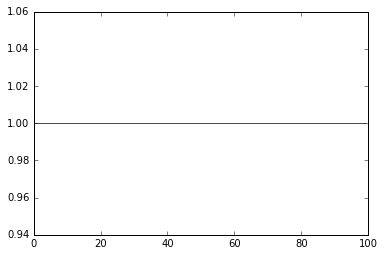

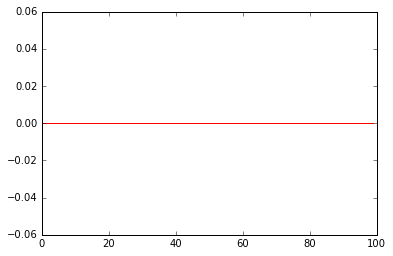

In [330]:
resultsDf = pd.DataFrame(results)
fig, fig1 = plt.subplots()
fig1.plot(resultsDf[0].values)
fig1.plot(resultsDf[1].values)
fig1.plot(resultsDf[2].values)

fig, fig2 = plt.subplots()
fig2.plot(resultsDf[3].values)
fig2.plot(resultsDf[4].values)
fig2.plot(resultsDf[5].values)
fig2.legend(loc = "upper center")
plt.show()

In [394]:
polarizedSentences.columns

Index([u'index', u'docName', u'dirName', u'idx', u'startByte', u'endByte',
       u'sentLen', u'annotsCount', u'text', u'sentiment-measured',
       u'sentiment-type', u'sentiment-intensity', u'textUpper', u'wordsList',
       u'wordCount', u'negations', u'priorpolarityCountnegative',
       u'priorpolarityCountpositive', u'priorpolarityCountnegativestrongsubj',
       u'priorpolarityCountpositivestrongsubj',
       u'priorpolarityCountnegativeweaksubj',
       u'priorpolarityCountpositiveweaksubj', u'activeCountweaksubj',
       u'passiveCountweaksubj', u'activeCountstrongsubj',
       u'passiveCountstrongsubj', u'activeCount', u'passiveCount',
       u'hostileCountweaksubj', u'strongCountweaksubj',
       u'hostileCountstrongsubj', u'strongCountstrongsubj', u'hostileCount',
       u'strongCount', u'positivCountweaksubj', u'negativCountweaksubj',
       u'positivCountstrongsubj', u'negativCountstrongsubj', u'positivCount',
       u'negativCount', u'morePositiveThanNegativeStrong',
   

In [415]:
from sklearn.decomposition import PCA

In [423]:
pca = PCA()
pca.fit(polarizedSentences[['priorpolarityCountnegative', 'negations', 'priorpolarityCountpositive', 'priorpolarityCountnegativestrongsubj',
       'priorpolarityCountpositivestrongsubj', 'priorpolarityCountnegativeweaksubj', 'priorpolarityCountpositiveweaksubj',
       'activeCountweaksubj', 'passiveCountweaksubj', 'activeCountstrongsubj', 'passiveCountstrongsubj', 'activeCount',
       'passiveCount', 'hostileCountweaksubj', 'strongCountweaksubj', 'hostileCountstrongsubj', 'strongCountstrongsubj', 
       'hostileCount', 'strongCount', 'positivCountweaksubj', 'negativCountweaksubj', 'positivCountstrongsubj', 'negativCountstrongsubj',
       'positivCount', 'negativCount', 'morePositiveThanNegativeStrong', 'morePositiveThanNegativeWeak', 'morePositiveThanNegative']].values)
pca.explained_variance_ratio_

array([  5.42568707e-01,   2.15938876e-01,   1.64196339e-01,
         4.58460240e-02,   1.07597767e-02,   6.50869405e-03,
         3.36595161e-03,   2.50237022e-03,   1.85118298e-03,
         1.44957928e-03,   1.17122536e-03,   8.32308571e-04,
         6.89718708e-04,   6.63660468e-04,   4.10277249e-04,
         3.55958676e-04,   3.08299850e-04,   2.63681184e-04,
         2.01238226e-04,   1.16130949e-04,   2.90364407e-32,
         4.26089946e-33,   4.26089946e-33,   4.26089946e-33,
         4.26089946e-33,   4.26089946e-33,   4.26089946e-33,
         3.06130445e-33])

In [425]:
sentences = polarizedSentences[['priorpolarityCountnegative', 'negations', 'priorpolarityCountpositive', 'priorpolarityCountnegativestrongsubj',
       'priorpolarityCountpositivestrongsubj', 'priorpolarityCountnegativeweaksubj', 'priorpolarityCountpositiveweaksubj',
       'activeCountweaksubj', 'passiveCountweaksubj', 'activeCountstrongsubj', 'passiveCountstrongsubj', 'activeCount',
       'passiveCount', 'hostileCountweaksubj', 'strongCountweaksubj', 'hostileCountstrongsubj', 'strongCountstrongsubj', 
       'hostileCount', 'strongCount', 'positivCountweaksubj', 'negativCountweaksubj', 'positivCountstrongsubj', 'negativCountstrongsubj',
       'positivCount', 'negativCount', 'sentiment-intensity']].copy()

In [426]:
sentences.shape

(9118, 26)